 # Modelo Média Móvel

 - MA_MODEL

In [1]:
#  importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- Importando os dados dos crimes sexuais

In [2]:
crimes_sexuais = pd.read_csv('crimes_sexuais.csv')

In [3]:
crimes_sexuais.head()

,data_da_ocorrencia,crimes_sexuais
0,2014-01-01,43
1,2014-01-02,5
2,2014-01-03,3
3,2014-01-04,3
4,2014-01-05,8


 - Convertendo as coluna data para Datetime 

In [4]:
crimes_sexuais['data_da_ocorrencia'] = pd.to_datetime(crimes_sexuais['data_da_ocorrencia'])

 - Selecionando apenas os delitos concluídos nos anos 2014 e 2015

In [5]:
crimes_sexuais = crimes_sexuais.query(' data_da_ocorrencia >= "2014-01-01"')

In [6]:
crimes_sexuais['data_da_ocorrencia'].dt.year.value_counts()

2015    365
2014    365
Name: data_da_ocorrencia, dtype: int64

 - Definindo a data com índice

In [7]:
crimes_sexuais = crimes_sexuais.set_index('data_da_ocorrencia')

 - Graficando "crimes_sexuais"

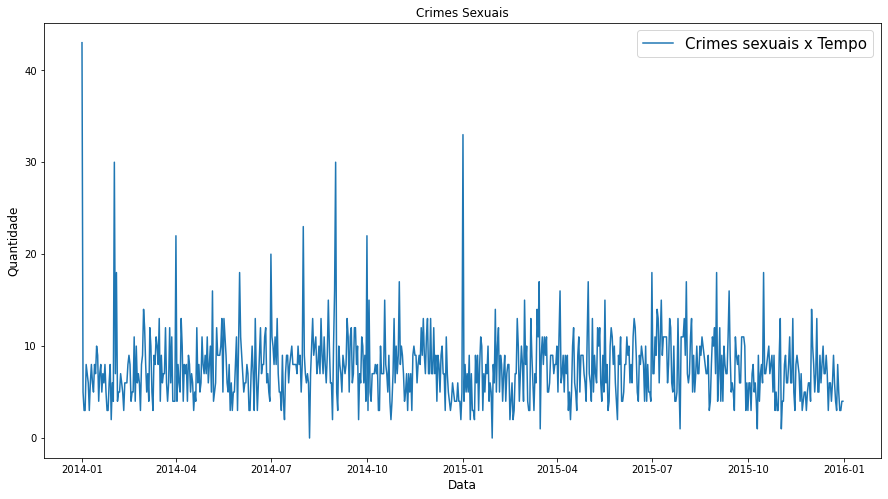

In [8]:
plt.figure(figsize=(15,8))
plt.plot(crimes_sexuais)
plt.title('Crimes Sexuais', fontsize=12)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
legenda= ['Crimes sexuais x Tempo']
plt.legend(legenda, fontsize=15, loc=1)
plt.show()

- Criando as amostras de treino e teste

In [9]:
t_treino = crimes_sexuais[crimes_sexuais.index<'2015-06-01'].index
t_teste = crimes_sexuais[crimes_sexuais.index>='2015-06-01'].index
X_treino = crimes_sexuais[crimes_sexuais.index<'2015-06-01']
X_teste = crimes_sexuais[crimes_sexuais.index>='2015-06-01']

- aplicando o modelo média móvel

In [10]:
forecast = len(X_teste)

In [11]:
y_hat_avg = X_teste.copy()

In [12]:
y_hat_avg['predicao'] = 0

In [13]:
for i in range(forecast):
    y_hat_avg['predicao'].iloc[i] = X_treino['crimes_sexuais'].rolling(i).mean().iloc[-1]

C:\Users\Biena\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
y_hat_avg = y_hat_avg.dropna()

In [15]:
t_treino = t_treino.values
X_treino = X_treino.values
t_teste = t_teste.values
X_teste = X_teste.values
X_pred = y_hat_avg.values

 - Graficando 

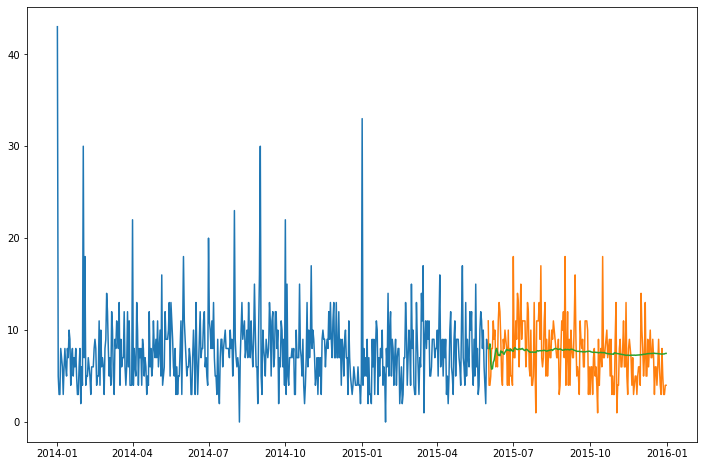

In [16]:
plt.figure(figsize=(12,8))
plt.plot(t_treino,X_treino)
plt.plot(t_teste,X_teste)
plt.plot(t_teste[1:],y_hat_avg['predicao'])

 - Calculando os erros

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
MSE = mean_squared_error(X_teste[1:],y_hat_avg['predicao'])

In [19]:
RMSE = np.sqrt(MSE)

In [20]:
print("RMSE = {:0.2f}".format(RMSE))

RMSE = 3.25
